In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

#load the data "M_100.pkl" using pickle
with open('M_100.pkl', 'rb') as f:
    Ms = pickle.load(f)
with open('ks', 'rb') as f:
    ks = pickle.load(f)

#Ms, ks = load('cifar10-resnet18k-p15-adam-reps')

In [8]:
print(ks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


## Simple Plot

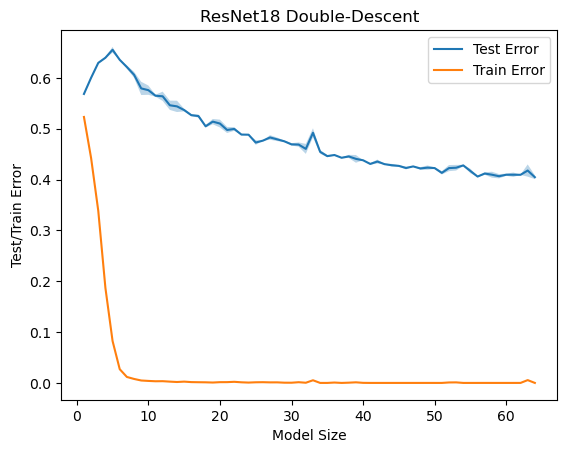

In [10]:
## data format:
## Ms[i]['Test Error'][s, epoch] : Test Error of model of size s, at epoch. For trial i (of 5 trials).

errs = np.array([M['Test Error'][:, -1] for M in Ms])

p = 0.15 # fraction of noise
errs = 1.0 - (1-p)*(1-errs) + errs*p/9.0 # remap clean test error --> noisy test error.

stds = np.std(errs, axis=0)
mean = np.mean(errs, axis=0)
train_err = np.mean([M['Train Error'][:, -1] for M in Ms], axis=0)


fig, ax = plt.subplots()
ax.plot(ks, mean, label='Test Error')
ax.plot(ks, train_err, label='Train Error')
ax.fill_between(ks, mean-stds, mean+stds ,alpha=0.3)
ax.set_xlabel("Model Size")
ax.set_ylabel("Test/Train Error")
ax.set_title("ResNet18 Double-Descent")
ax.legend()

## Fancier Plot

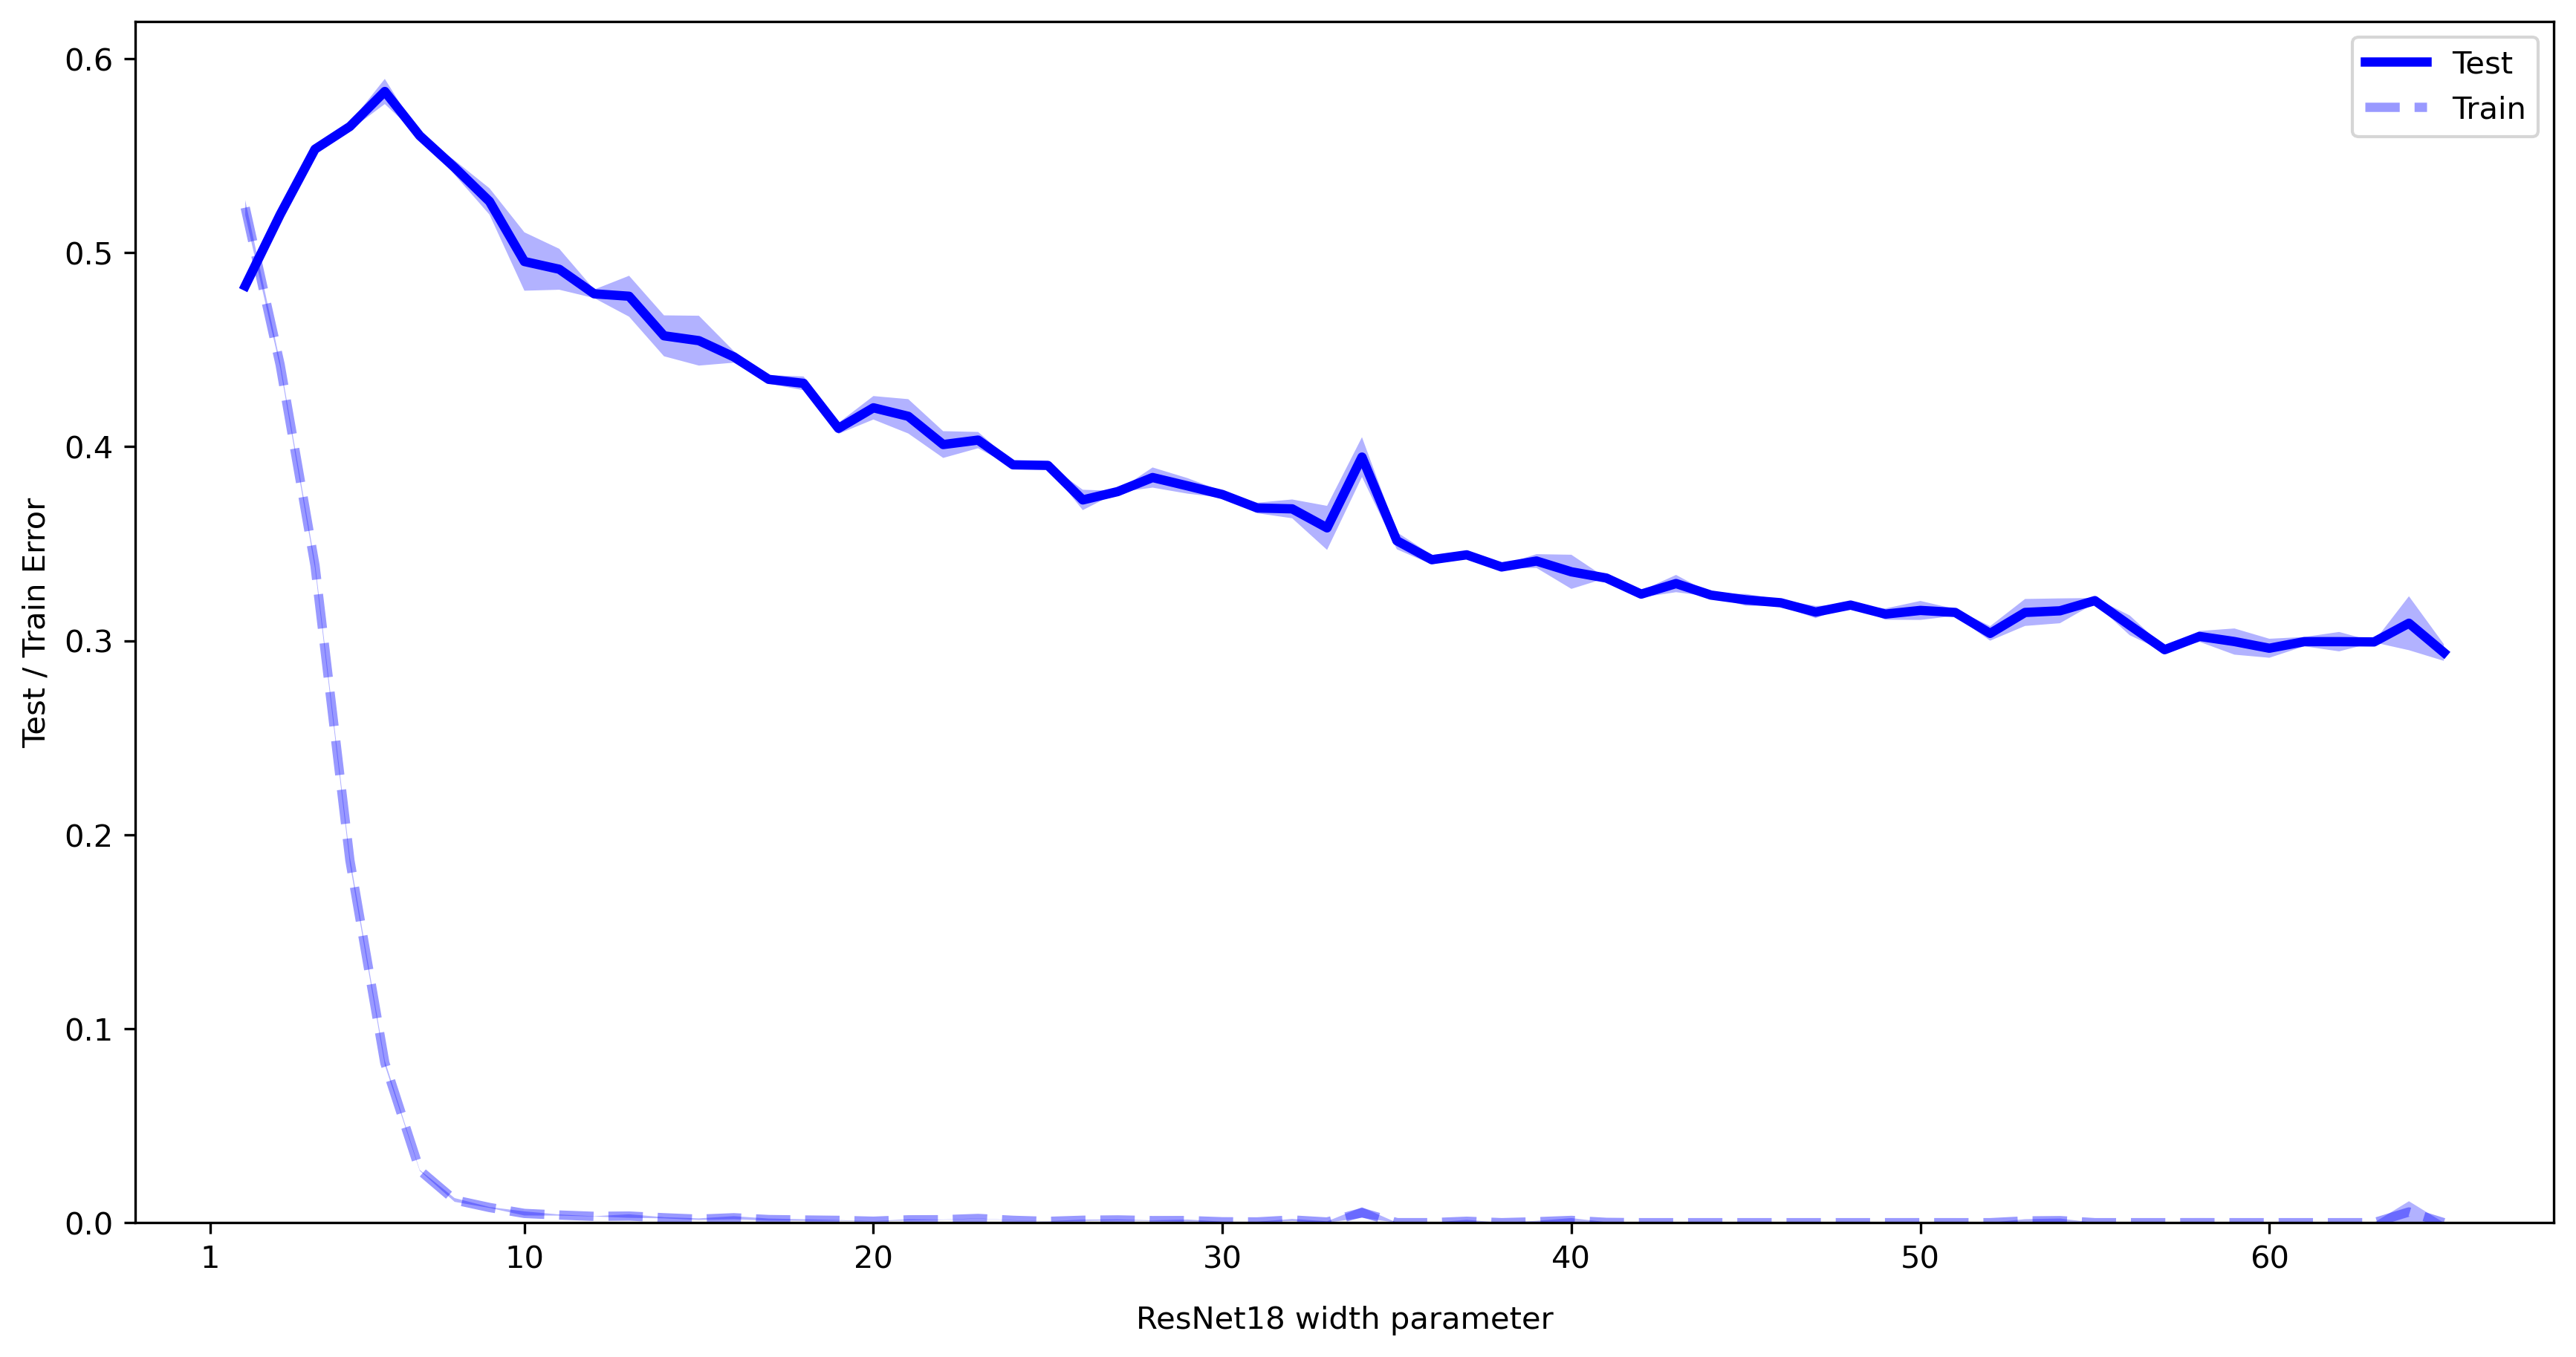

In [ ]:
def plot(Ms, ks, savepath=None,
             noise_level=0.15,
             linewidth=3, marker_size=4):
    # Ms: List of the line plots for eg: if plotting three noise levels this has length 3
    
    #plt.style.reload_library()
    #plt.style.use('~/hml-common/mplstyles/twocol.mpl')
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

    p=noise_level
    errs_te = np.array([M['Test Error'][:, -1] for M in Ms])
    errs_te = 1.0 - (1-p)*(1-errs_te) + errs_te*p/9.0 # noisy test
    stds_te = np.std(errs_te, axis=0)
    mean_te = np.mean(errs_te, axis=0)
    
    errs_tr = np.array([M['Train Error'][:, -1] for M in Ms])
    stds_tr = np.std(errs_tr, axis=0)
    mean_tr = np.mean(errs_tr, axis=0)
    

    ax.plot(ks, mean_te, '-', color='b',
            ms=marker_size, lw=linewidth, label='Test')
    ax.fill_between(ks, mean_te-stds_te, mean_te+stds_te ,alpha=0.3, facecolor='b')
    
    ax.plot(ks, mean_tr, '--', color='b',
            lw=linewidth, alpha=0.4, label='Train')    
    ax.fill_between(ks, mean_tr-stds_tr, mean_tr+stds_tr ,alpha=0.3, facecolor='b')
    
    
    #X-axis
    q = np.arange(len(ks))
    x_idx = [q[0]] + list(q[9::10])
    x_steps = np.array(ks)[x_idx]
    x_labs = ['%d' % x for x in x_steps]
    ax.set_xticks(x_idx)
    ax.set_xticklabels(x_labs)
    ax.set_xlabel('ResNet18 width parameter')
    ax.xaxis.labelpad = 10

    ax.set_ylabel('Test / Train Error')
    ax.set_ylim(bottom=0.0, top=None)
    ax.legend(loc='upper right')
    
    plt.show()


    
plot(Ms, ks,
     savepath=None,
     noise_level=0.15,
     linewidth=3, marker_size=4)